In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_recall_curve, auc, classification_report, roc_curve, average_precision_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [19]:
data = pd.read_csv('bostonbin.csv')

x = data.iloc[:, :-1]  # Atributos
y = data.iloc[:, -1]   # Saída

num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Melhor valor de C: 32
Melhor valor de gamma: 3.0517578125e-05
Acurácia do modelo SVM: 0.868421052631579
Relatório de Classificação do modelo SVM:
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85        69
         1.0       0.87      0.89      0.88        83

    accuracy                           0.87       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.87      0.87      0.87       152



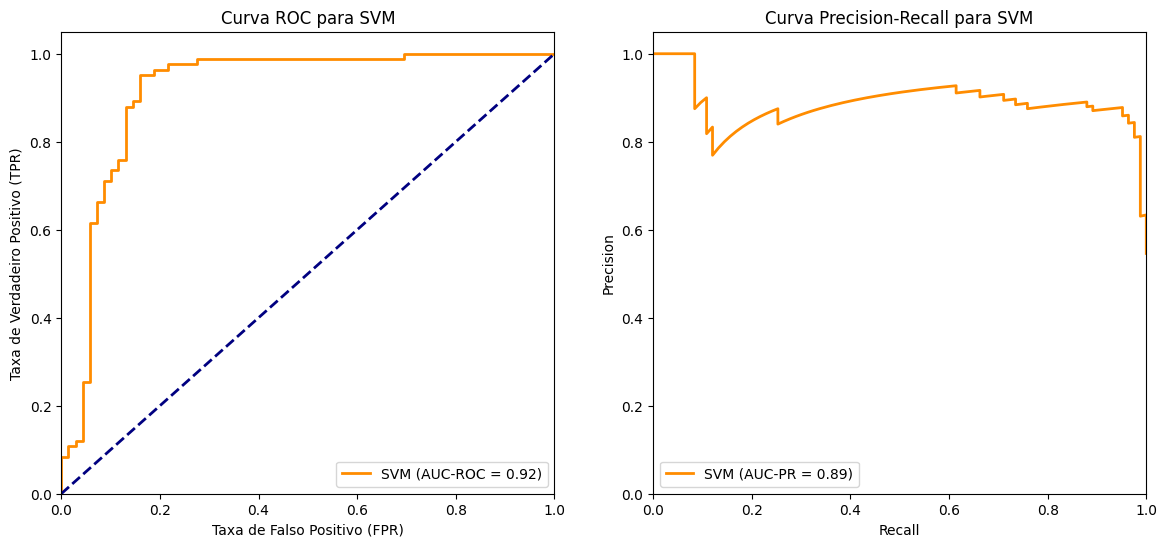

In [51]:
#Abordagem svm
param_grid_svm = {
    'C': [2**i for i in range(-5, 16, 2)],  # Valores de C
    'gamma': [2**i for i in range(-15, 4, 2)]  # Valores de gamma
}

# Crie o modelo SVM com kernel RBF
svm_model = SVC(kernel='rbf')

# Realize a busca em grade com validação cruzada em 10 folds para SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=kf, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(x_train, y_train)

# Obtenha os melhores hiperparâmetros do modelo SVM
best_C_svm = grid_search_svm.best_params_['C']
best_gamma_svm = grid_search_svm.best_params_['gamma']

# Treine o modelo SVM com os melhores hiperparâmetros
best_svm_model = SVC(kernel='rbf', C=best_C_svm, gamma=best_gamma_svm)
best_svm_model.fit(x_train, y_train)

# Treine o modelo SVM com os melhores hiperparâmetros
best_svm_model = SVC(kernel='rbf', C=best_C_svm, gamma=best_gamma_svm)
best_svm_model.fit(x_train, y_train)

# Faça previsões nos dados de teste para SVM
svm_predictions = best_svm_model.decision_function(x_test)
svm_predictions_print = best_svm_model.predict(x_test)

# Calcule as curvas ROC para SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_predictions)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Calcule a curva Precision-Recall e a área sob a curva Precision-Recall (AUC-PR) para SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm_predictions)
auc_svm_pr = average_precision_score(y_test, svm_predictions)

# Avalie o desempenho do modelo SVM
svm_accuracy = accuracy_score(y_test, svm_predictions_print)
svm_report = classification_report(y_test, svm_predictions_print)

print(f'Melhor valor de C: {best_C_svm}')
print(f'Melhor valor de gamma: {best_gamma_svm}')
print(f'Acurácia do modelo SVM: {svm_accuracy}')
print(f'Relatório de Classificação do modelo SVM:\n{svm_report}')


# Plote as curvas ROC e Precision-Recall para SVM
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC-ROC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC para SVM')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall_svm, precision_svm, lw=2, color='darkorange', label=f'SVM (AUC-PR = {auc_svm_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall para SVM')
plt.legend(loc="lower left")

plt.show()




Melhor altura máxima da árvore: 6
Melhor número mínimo de amostras em um nó folha: 5
Acurácia do modelo da árvore de decisão: 0.855263
Relatório de Classificação do modelo da árvore de decisão:
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85        69
         1.0       0.91      0.82      0.86        83

    accuracy                           0.86       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.86      0.86      0.86       152



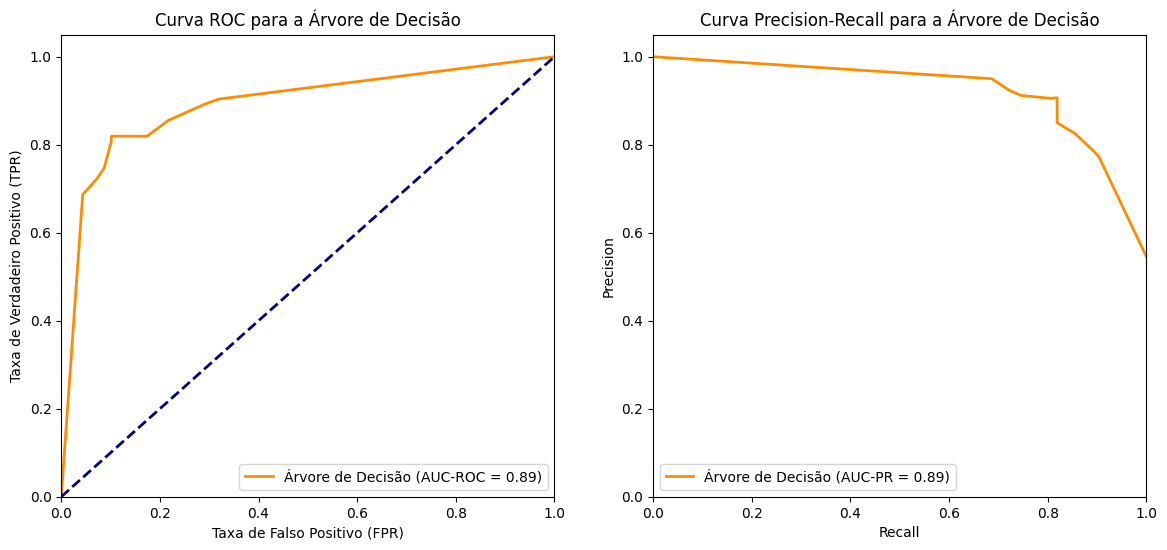

In [46]:
# Abordagem Decision Tree
param_grid_tree = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Altura máxima da árvore
    'min_samples_leaf': [1, 2, 3, 4, 5],  # Número mínimo de amostras em um nó folha
    'criterion': ['gini']  # Critério de divisão da árvore (índice de Gini)
}

tree_model = DecisionTreeClassifier(criterion='gini')

# Realize a busca em grade com validação cruzada em 10 folds para Árvore de Decisão
grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=kf, n_jobs=-1, scoring='accuracy')
grid_search_tree.fit(x_train, y_train)

# Obtenha os melhores hiperparâmetros do modelo de Árvore de Decisão
best_max_depth_tree = grid_search_tree.best_params_['max_depth']
best_min_samples_leaf_tree = grid_search_tree.best_params_['min_samples_leaf']

# Treine o modelo de Árvore de Decisão com os melhores hiperparâmetros
best_tree_model = DecisionTreeClassifier(max_depth=best_max_depth_tree, min_samples_leaf=best_min_samples_leaf_tree, criterion='gini')
best_tree_model.fit(x_train, y_train)

# Faça previsões nos dados de teste para a Árvore de Decisão
tree_predictions = best_tree_model.predict_proba(x_test)[:, 1]
tree_predictions_print = best_tree_model.predict(x_test)

# Calcule as curvas ROC para a Árvore de Decisão
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_predictions)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Calcule a curva Precision-Recall e a área sob a curva Precision-Recall (AUC-PR) para a Árvore de Decisão
precision_tree, recall_tree, _ = precision_recall_curve(y_test, tree_predictions)
auc_tree_pr = average_precision_score(y_test, tree_predictions)

# Avalie o desempenho do modelo da árvore de decisão
tree_accuracy = accuracy_score(y_test, tree_predictions_print)
tree_report = classification_report(y_test, tree_predictions_print)

#prints de métricas
print(f'Melhor altura máxima da árvore: {best_max_depth_tree}')
print(f'Melhor número mínimo de amostras em um nó folha: {best_min_samples_leaf_tree}')
print(f'Acurácia do modelo da árvore de decisão: {tree_accuracy:2f}')
print(f'Relatório de Classificação do modelo da árvore de decisão:\n{tree_report}')

# Plote as curvas ROC e Precision-Recall para a Árvore de Decisão
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label=f'Árvore de Decisão (AUC-ROC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel ('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC para a Árvore de Decisão')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall_tree, precision_tree, lw=2, color='darkorange', label=f'Árvore de Decisão (AUC-PR = {auc_tree_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall para a Árvore de Decisão')
plt.legend(loc="lower left")

plt.show()

